In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input layer (784 input features)
        self.fc2 = nn.Linear(128, 10)   # Output layer (10 classes)
        self.relu = nn.ReLU()           # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first layer
        x = self.fc2(x)             # Output layer
        return x

# Initialize the neural network
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification tasks
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

In [ ]:
from torchvision import datasets, transforms

# Load MNIST dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=32, shuffle=True)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients

        # Forward pass
        outputs = model(inputs.view(-1, 784))  # Flatten input
        loss = criterion(outputs, labels)      # Compute loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 0.879483888999621
Epoch 2, Loss: 0.37621985799074176
Epoch 3, Loss: 0.3224979918340842
Epoch 4, Loss: 0.2928720515648524
Epoch 5, Loss: 0.2706923551797867


In [ ]:
# Load the Fashion MNIST dataset
import tensorflow as tf
from tensorflow.keras import layers, models
(train_images, train_activityels), (test_images, test_activityels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the model
model_tf = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input layer to flatten the 2D images
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
model_tf.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_tf.fit(train_images, train_activityels, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7807 - loss: 0.6272
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8630 - loss: 0.3782
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8746 - loss: 0.3418
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8844 - loss: 0.3130
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8920 - loss: 0.2958
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8967 - loss: 0.2790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9007 - loss: 0.2639
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9075 - loss: 0.2485
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9097 - loss: 0.2430
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9131 - loss: 0.2324


In [ ]:
import numpy as np
# Load the data without specifying a shape initially
Xtrain = np.load('/content/drive/MyDrive/Colab_Notebooks/sampleDs/unlabelled_train_data_images.npy')

# Print the shape and size of the loaded data to inspect its structure
print("Original shape:", Xtrain.shape)
print("Total size:", Xtrain.size)

Original shape: (60000, 1, 28, 28)
Total size: 47040000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(Xtrain, test_size=0.2, random_state=42)
#(x_train, y_train), (x_test, y_test)
x_train.shape

(48000, 1, 28, 28)

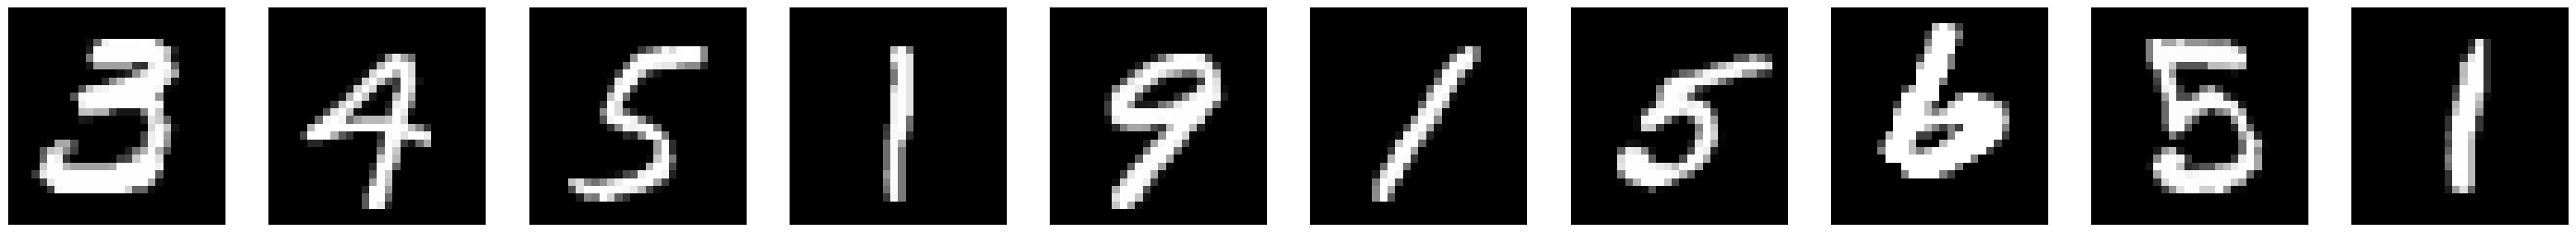

In [ ]:
#cluster_labels=np.array([7, 1, 7, 3, 8,7,9,0,7,7])
#print(cluster_labels)
import matplotlib.pyplot as plt
x_train_sample=x_train[0:10]
fig, axes = plt.subplots(1, len(x_train_sample), figsize=(40, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
        # Display the image using processed_samples[i]
        ax.imshow(x_train_sample[i].squeeze(), cmap='gray')  # permute and convert to numpy
        #ax.set_title(f'Predicted: {cluster_labels[i]}')
        ax.axis('off')

#plt.tight_layout()
plt.subplots_adjust()
plt.show()

x_train_sample=x_train[0:384]

In [ ]:
#(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() 0 , 384
y_train_sample = np.array([3,4,5,1,9,1,5,6,5,1,7,6,4,6,3,4,0,2,8,1,7,8,7,3,7,0,8,1,3,6,1,0,0,2,4,0,9,1,2,6,3,9,7,1,6,7,4,7
                    ,4,8,8,7,1,6,2,9,3,8,1,7,0,6,0,1,4,9,0,5,6,3,2,9,9,5,5,2,7,4,3,4,7,9,4,8,7,0,2,4,6,4,7,9,4,0,9,5
                    ,8,9,5,9,8,9,0,9,8,5,7,1,5,0,0,1,4,2,5,9,6,6,3,0,0,6,3,2,5,3,1,5,1,6,3,2,1,3,8,7,0,2,5,3,1,6,6,5
                    ,3,4,9,4,6,9,8,8,5,8,6,9,8,3,2,4,6,4,1,8,5,9,7,6,0,6,1,7,2,9,2,8,7,2,0,0,7,6,5,2,7,7,2,7,9,1,4,3
                    ,3,4,0,9,1,7,6,6,5,0,0,7,0,9,8,3,8,9,1,7,4,2,5,1,1,4,5,3,6,1,1,7,5,3,7,7,0,0,1,6,2,7,7,0,9,9,8,0
                    ,2,9,3,9,3,3,0,6,3,9,5,9,7,5,8,0,7,0,8,3,1,4,2,5,5,2,7,8,8,0,5,3,9,0,0,6,7,0,7,5,2,0,8,3,2,0,7,1
                    ,8,9,4,3,7,9,6,9,6,1,8,6,4,7,1,6,0,4,1,0,9,2,8,3,3,5,7,6,4,6,9,5,8,6,6,6,8,7,3,7,6,0,6,5,7,4,4,5
                    ,7,5,9,9,3,5,0,2,5,3,2,0,6,0,3,7,0,5,8,8,4,7,7,8,0,0,1,3,1,9,9,4,7,8,9,3,1,6,9,6,0,2,3,9,6,8,6,2])
y_train_sample[368] = 8
y_train_sample[374] = 6

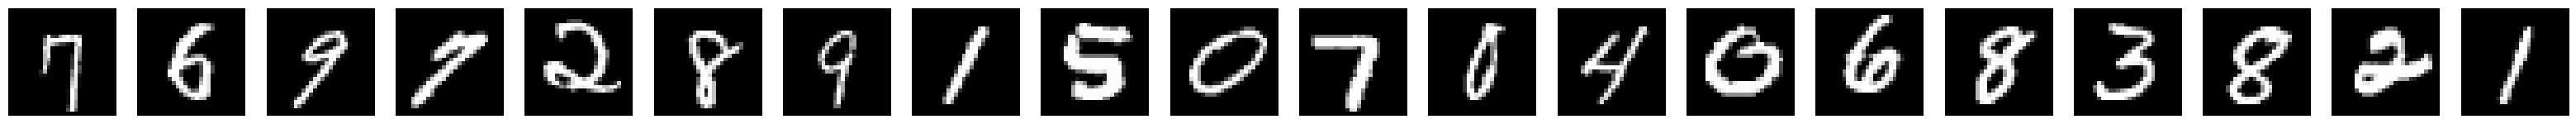

In [ ]:
#cluster_labels=np.array([7, 1, 7, 3, 8,7,9,0,7,7])
#print(cluster_labels)
x_test_sample=x_test[0:20]
fig, axes = plt.subplots(1, len(x_test_sample), figsize=(40, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
        # Display the image using processed_samples[i]
        ax.imshow(x_test_sample[i].squeeze(), cmap='gray')  # permute and convert to numpy
        #ax.set_title(f'Predicted: {cluster_labels[i]}')
        ax.axis('off')

#plt.tight_layout()
plt.subplots_adjust()
plt.show()

In [ ]:
#(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() 0 , 20
y_test_sample = np.array([7,6,9,7,2,8,9,1,5,0,7,0,4,0,6,8,3,8,2,1])
print(y_test_sample.shape)

(20,)


[335 130  75 218 185 117 330 304]


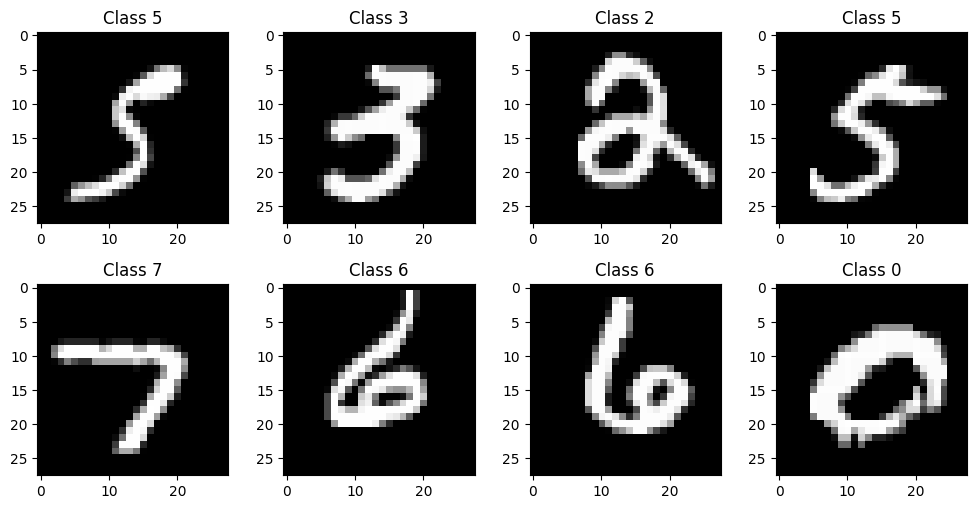

In [ ]:
# show image of training data
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train_sample.shape[0], 8) # select 8 digits(0~9) randomly
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(np.squeeze(x_train_sample[im_index]), cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train_sample[im_index])
plt.tight_layout()

In [ ]:
# Validate the model on x_train_sample and y_train_sample
model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation during evaluation
    inputs = torch.tensor(x_train_sample).float() # Convert numpy array to torch tensor and ensure float type
    inputs = inputs.view(-1, 784) # Flatten the input

    outputs = model(inputs)
    loss = criterion(outputs, torch.tensor(y_train_sample).long()) # Convert numpy array to torch tensor and ensure long type for labels

    _, predicted = torch.max(outputs.data, 1) # Get the predicted classes
    correct = (predicted == torch.tensor(y_train_sample).long()).sum().item() # Count correct predictions
    total = y_train_sample.shape[0] # Total number of samples

    print(f"Validation Loss: {loss.item():.4f}")
    print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Loss: 0.7784
Validation Accuracy: 87.24%


In [ ]:
# Test the model on x_test_sample and y_test_sample
model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation during evaluation
    inputs = torch.tensor(x_test_sample).float() # Convert numpy array to torch tensor and ensure float type
    inputs = inputs.view(-1, 784) # Flatten the input

    outputs = model(inputs)
    loss = criterion(outputs, torch.tensor(y_test_sample).long()) # Convert numpy array to torch tensor and ensure long type for labels

    _, predicted = torch.max(outputs.data, 1) # Get the predicted classes
    correct = (predicted == torch.tensor(y_test_sample).long()).sum().item() # Count correct predictions
    total = y_test_sample.shape[0] # Total number of samples

    print(f"Test Loss: {loss.item():.4f}")
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Loss: 0.2880
Test Accuracy: 90.00%


In [ ]:
# Train the model
model_tf.fit(x_train_sample.reshape(-1, 28, 28), y_train_sample, epochs=10, batch_size=32)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1039 - loss: 5.6563
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3001 - loss: 2.6766
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5736 - loss: 1.4252
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7177 - loss: 1.0487
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7805 - loss: 0.8307
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8013 - loss: 0.7390
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8278 - loss: 0.6321
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8817 - loss: 0.5098
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8673 - loss: 0.5396
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9027 - loss: 0.4314


In [ ]:
# Evaluate the model on x_test_sample and y_test_sample
loss_tf, accuracy_tf = model_tf.evaluate(x_test_sample.reshape(-1, 28, 28), y_test_sample, verbose=0)

print(f"TensorFlow Test Loss: {loss_tf:.4f}")
print(f"TensorFlow Test Accuracy: {100 * accuracy_tf:.2f}%")

# Compare with PyTorch results
print(f"PyTorch Test Loss: {loss.item():.4f}")
print(f"PyTorch Test Accuracy: {100 * correct / total:.2f}%")

TensorFlow Test Loss: 1.0604
TensorFlow Test Accuracy: 70.00%
PyTorch Test Loss: 0.2880
PyTorch Test Accuracy: 90.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


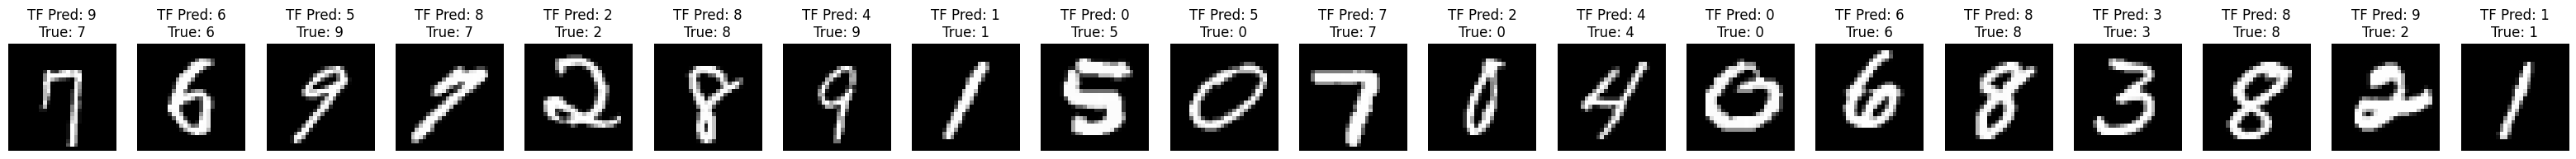

In [ ]:
# Get predictions from the TensorFlow model
tf_predictions = np.argmax(model_tf.predict(x_test_sample.reshape(-1, 28, 28)), axis=-1)

# Visualize a few test images with their predicted and true labels (TensorFlow)
fig, axes = plt.subplots(1, len(x_test_sample), figsize=(40, 15))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_sample[i].squeeze(), cmap='gray')
    ax.set_title(f'TF Pred: {tf_predictions[i]}\nTrue: {y_test_sample[i]}')
    ax.axis('off')

plt.subplots_adjust()
plt.show()

practice

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_activityels), (test_images, test_activityels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model_tf_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Compile the model
model_tf_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import torch.optim as optim
import torch.nn as nn

# Make sure to define the model using the PyTorch-defined CNN
model_py_2 = SimpleCNN()  # Ensure this is the PyTorch model

# Define the optimizer and loss function
optimizer = optim.Adam(model_py_2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Train the model for 10 epochs
model_tf_2.fit(train_images, train_activityels, epochs=10, batch_size=32, validation_data=(test_images, test_activityels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.3795 - loss: 1.7011 - val_accuracy: 0.5674 - val_loss: 1.2157
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5937 - loss: 1.1631 - val_accuracy: 0.6314 - val_loss: 1.0456
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6551 - loss: 1.0001 - val_accuracy: 0.6600 - val_loss: 0.9983
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.6835 - loss: 0.9122 - val_accuracy: 0.6599 - val_loss: 0.9891
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.7107 - loss: 0.8335 - val_accuracy: 0.6855 - val_loss: 0.9239
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.7323 - loss: 0.7702 - val_accuracy: 0.6866 - val_loss: 0.9220
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7453 - loss: 0.7311 - val_accuracy: 0.6897 - val_loss: 0.9076
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7645 -

In [ ]:
# Training loop for PyTorch
for epoch in range(10):
    running_loss = 0.0
    for inputs, activityels in trainloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model_py_2(inputs)  # Forward pass
        loss = criterion(outputs, activityels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize
        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')

Epoch 1, Loss: 0.4192700172349649
Epoch 2, Loss: 0.38086029308980957
Epoch 3, Loss: 0.35081447090331513
Epoch 4, Loss: 0.32387996407050545
Epoch 5, Loss: 0.2955438116051719
Epoch 6, Loss: 0.2709622917099786
Epoch 7, Loss: 0.2552443920269427
Epoch 8, Loss: 0.23734067818143967
Epoch 9, Loss: 0.21384395646039808
Epoch 10, Loss: 0.20009029425873695


In [ ]:
# Evaluate the model
test_loss, test_acc = model_tf_2.evaluate(test_images, test_activityels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7143 - loss: 0.9086
Test accuracy: 0.7028999924659729


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, activityels in testloader:
        outputs = model_py_2(inputs)
        _, predicted = torch.max(outputs, 1)
        total += activityels.size(0)
        correct += (predicted == activityels).sum().item()

print(f'Test accuracy: {100 * correct / total}%')

Test accuracy: 68.29%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the FNN model
model_fnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes for the Iris dataset
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_fnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_fnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.6004 - loss: 0.9446 - val_accuracy: 0.7667 - val_loss: 0.8466
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7629 - loss: 0.8575 - val_accuracy: 0.8333 - val_loss: 0.7805
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8173 - loss: 0.7703 - val_accuracy: 0.8333 - val_loss: 0.7200
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8235 - loss: 0.7066 - val_accuracy: 0.8667 - val_loss: 0.6672
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8579 - loss: 0.6443 - val_accuracy: 0.8333 - val_loss: 0.6267
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8498 - loss: 0.6230 - val_accuracy: 0.9000 - val_loss: 0.5998
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8592 - loss: 0.5700 - val_accuracy: 0.8667 - val_loss: 0.5574
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8519 - loss: 0.5535 - val_accuracy: 0.8667 - val_loss: 0.5217

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Build the CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.3824 - loss: 1.7152 - val_accuracy: 0.5764 - val_loss: 1.2023
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.5924 - loss: 1.1624 - val_accuracy: 0.6410 - val_loss: 1.0426
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 105ms/step - accuracy: 0.6504 - loss: 1.0111 - val_accuracy: 0.6570 - val_loss: 0.9927
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 100ms/step - accuracy: 0.6841 - loss: 0.9121 - val_accuracy: 0.6832 - val_loss: 0.9392
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.7058 - loss: 0.8522 - val_accuracy: 0.6906 - val_loss: 0.9104
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7332 - loss: 0.7764 - val_accuracy: 0.7008 - val_loss: 0.8880
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.7482 - loss: 0.7314 - val_accuracy: 0.6953 - val_loss: 0.9050
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.7658 - loss: 0.6

In [ ]:
import numpy as np

# Generate synthetic sine wave data
t = np.linspace(0, 100, 10000)
X = np.sin(t).reshape(-1, 1)

# Prepare sequences
def create_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 100
X_seq, y_seq = create_sequences(X, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [ ]:
# Build the RNN model
model_rnn = models.Sequential([
    layers.SimpleRNN(128, input_shape=(seq_length, 1)),
    layers.Dense(1)  # Output is a single value (next point in the sequence)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='mse')

# Train the model
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0220 - val_loss: 6.1786e-06
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 6.6516e-06 - val_loss: 2.1411e-06
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 3.6769e-06 - val_loss: 1.1446e-06
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 1.7306e-06 - val_loss: 9.1710e-07
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 8.9717e-07 - val_loss: 1.1039e-06
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 9.9134e-07 - val_loss: 5.6123e-07
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.1533e-06 - val_loss: 5.9519e-06
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.6802e-05 - val_loss: 1.9349e-06
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 2.8987e-06 - val_loss: 1.1471e-06
Epoch 10/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.2222e-05 - val_loss: 2.0127e-06


Generative Adversarial Networks(GANS)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Preprocess X_test in the same way
X_test = (X_test.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_test = X_test.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Create separate variables for autoencoder data to avoid potential conflicts
X_train_ae = X_train
X_test_ae = X_test

# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # Should print: (60000, 784)
print(f"X_test shape: {X_test.shape}")    # Should print: (10000, 784)
print(f"X_train_ae shape: {X_train_ae.shape}")  # Should print: (60000, 784)
print(f"X_test_ae shape: {X_test_ae.shape}")    # Should print: (10000, 784)


# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create GAN model: stack generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 1000
batch_size = 32
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator with real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)  # Random real images
    real_imgs = X_train[idx]
    real_labels = np.ones((half_batch, 1))  # Real labels (1s)

    # Train discriminator with fake images
    noise = np.random.normal(0, 1, (half_batch, 100))  # Random noise input
    fake_imgs = generator.predict(noise)  # Fake images generated by the generator
    fake_labels = np.zeros((half_batch, 1))  # Fake labels (0s)

    # Train the discriminator on real and fake images
    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    # Train the generator (the generator wants to fool the discriminator)
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate new noise
    gan_labels = np.ones((batch_size, 1))  # We want the generator to produce "real" images
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Log progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")

X_train shape: (60000, 784)
X_test shape: (10000, 784)
X_train_ae shape: (60000, 784)
X_test_ae shape: (10000, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.6260332465171814, Generator Loss: 1.8138328790664673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 

In [ ]:
# Define the encoder
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Build the full autoencoder
encoder = build_encoder()
decoder = build_decoder()

input_img = layers.Input(shape=(784,))
encoded_img = encoder(input_img)
decoded_img = decoder(encoded_img)

autoencoder = models.Model(input_img, decoded_img)

In [ ]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder using the new variables
autoencoder.fit(X_train_ae, X_train_ae, epochs=50, batch_size=256, validation_data=(X_test_ae, X_test_ae))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.9254 - val_loss: 0.9258
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.9253 - val_loss: 0.9258
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.9255 - val_loss: 0.9258
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.9255 - val_loss: 0.9258
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.9254 - val_loss: 0.9258
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.9254 - val_loss: 0.9258
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.9254 - val_loss: 0.9258
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.9252 - val_loss: 0.9258
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.9253 - val_loss: 0.9258
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.9253 - val_loss: 0.9258
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.9253 - val_loss: 0.9258
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 